In [27]:
import os
from bigxml import Parser, xml_handle_element, xml_handle_text
from dataclasses import dataclass
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [28]:
@xml_handle_element("en-export", "note")
@dataclass
class Note:
    title: str = np.nan
    created: str = np.nan
    updated: str =np.nan
    content: str = np.nan
    tag: str = np.nan
    attributes: str = np.nan

    @xml_handle_element("title")
    def handle_title(self, node):
        self.title = node.text

    @xml_handle_element("created")
    def handle_created(self, node):
        self.created = node.text

    @xml_handle_element("updated")
    def handle_updated(self, node):
        self.updated = node.text

    @xml_handle_element("content")
    def handle_content(self, node):
        soup = BeautifulSoup(node.text)
        self.content = soup.text

    @xml_handle_element("tag")
    def handle_tag(self, node):
        self.tag = node.text

    @xml_handle_element("note-attributes")
    def handle_attributes(self, node):
        self.attributes = node.text



In [42]:
notes = []

# with open("../../enex-files/Evernote.enex", "rb") as f:
#     for item in Parser(f).iter_from(Note):
#         notes.append(item)

folder = input("Enter relative path to folder containing enex-files:")
for file in os.listdir(folder):
    with open(folder+file, "rb") as f:
        try:
            for item in Parser(f).iter_from(Note):
                notes.append(item)
        except Exception as e:
            print(e)

Undefined entity &nbsp;: line 13655620, column 6621


In [43]:
len(notes)

6547

In [44]:
import numpy as np

df = pd.DataFrame(notes)
df["created"] = pd.to_datetime(df.created)
df["updated"] = pd.to_datetime(df.updated)
df.shape

(6547, 6)

In [ ]:
df.head(3)

<BarContainer object of 9 artists>

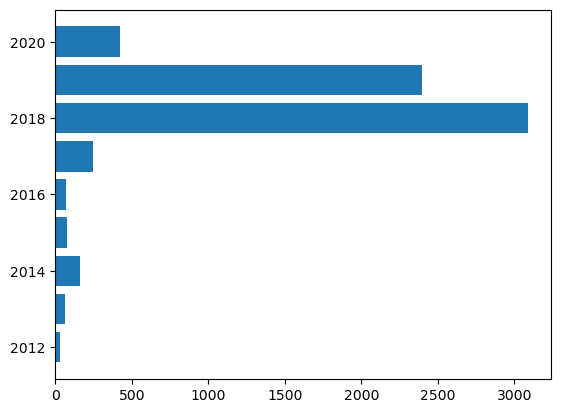

In [46]:
tmp = df.created.dt.year.value_counts()
plt.barh(tmp.index, tmp.values)